In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

2.2.0
2.3.0-tf


In [3]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd drive/My\ Drive

/content/drive/My Drive


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [5]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [9]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 57us/step - loss: 0.5327 - accuracy: 0.7517 - val_loss: 0.4264 - val_accuracy: 0.7808
Epoch 2/100
30162/30162 [==============================] - 1s 50us/step - loss: 0.3604 - accuracy: 0.8292 - val_loss: 0.3446 - val_accuracy: 0.8350
Epoch 3/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3392 - accuracy: 0.8394 - val_loss: 0.3351 - val_accuracy: 0.8435
Epoch 4/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3335 - accuracy: 0.8436 - val_loss: 0.3337 - val_accuracy: 0.8427
Epoch 5/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3305 - accuracy: 0.8438 - val_loss: 0.3290 - val_accuracy: 0.8461
Epoch 6/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.3289 - accuracy: 0.8460 - val_loss: 0.3285 - val_accuracy: 0.8475
Epoch 7/100
30162/30162 [==============================] - 2s 

In [0]:
history_sgd.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

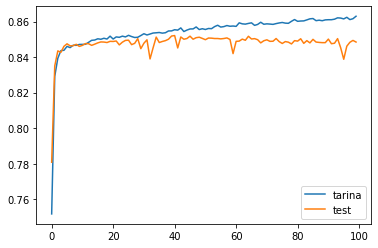

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

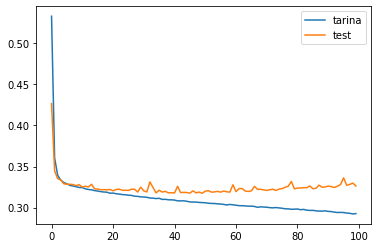

In [11]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [0]:
sgd_without_nesterov = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd_without_nesterov, metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.2928 - accuracy: 0.8626 - val_loss: 0.3278 - val_accuracy: 0.8486
Epoch 2/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.2924 - accuracy: 0.8620 - val_loss: 0.3299 - val_accuracy: 0.8458
Epoch 3/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.2918 - accuracy: 0.8634 - val_loss: 0.3292 - val_accuracy: 0.8465
Epoch 4/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.2918 - accuracy: 0.8640 - val_loss: 0.3279 - val_accuracy: 0.8465
Epoch 5/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.2916 - accuracy: 0.8636 - val_loss: 0.3316 - val_accuracy: 0.8476
Epoch 6/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.2913 - accuracy: 0.8623 - val_loss: 0.3281 - val_accuracy: 0.8491
Epoch 7/100
30162/30162 [==============================] - 1s 

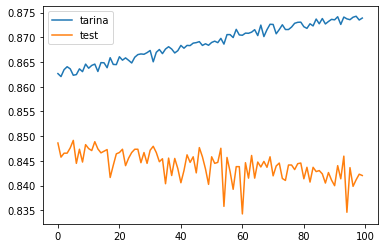

In [18]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

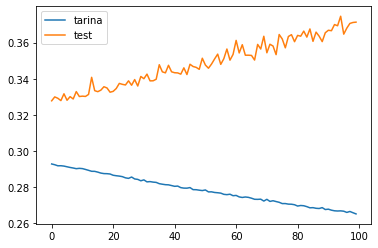

In [19]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [15]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_RMS = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [0]:
RMS = keras.optimizers.RMSprop(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss="binary_crossentropy",optimizer=RMS, metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_RMS])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.3681 - accuracy: 0.8557 - val_loss: 0.3964 - val_accuracy: 0.8450
Epoch 2/100
30162/30162 [==============================] - 1s 50us/step - loss: 0.3720 - accuracy: 0.8520 - val_loss: 0.3998 - val_accuracy: 0.8401
Epoch 3/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.3659 - accuracy: 0.8506 - val_loss: 0.3834 - val_accuracy: 0.8410
Epoch 4/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.3659 - accuracy: 0.8526 - val_loss: 0.3925 - val_accuracy: 0.8193
Epoch 5/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.3660 - accuracy: 0.8539 - val_loss: 0.3891 - val_accuracy: 0.8469
Epoch 6/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.3707 - accuracy: 0.8536 - val_loss: 0.3752 - val_accuracy: 0.8470
Epoch 7/100
30162/30162 [==============================] - 2s 

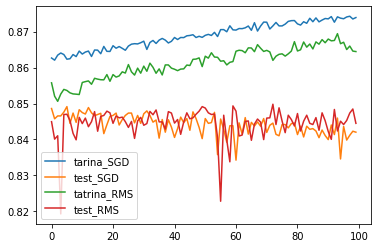

In [23]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina_SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test_SGD")
plt.plot(history_RMS.history['accuracy'], label='tatrina_RMS')
plt.plot(history_RMS.history['val_accuracy'], label='test_RMS')
plt.legend()
plt.show()

# Adam

In [0]:
model.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])
history_adam = History()

In [27]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 57us/step - loss: 0.3524 - accuracy: 0.8683 - val_loss: 0.3950 - val_accuracy: 0.8442
Epoch 2/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3501 - accuracy: 0.8688 - val_loss: 0.3943 - val_accuracy: 0.8445
Epoch 3/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.3490 - accuracy: 0.8694 - val_loss: 0.3938 - val_accuracy: 0.8449
Epoch 4/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3480 - accuracy: 0.8699 - val_loss: 0.3944 - val_accuracy: 0.8444
Epoch 5/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.3475 - accuracy: 0.8701 - val_loss: 0.3949 - val_accuracy: 0.8448
Epoch 6/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3469 - accuracy: 0.8706 - val_loss: 0.3947 - val_accuracy: 0.8447
Epoch 7/100
30162/30162 [==============================] - 2s 

In [28]:
adam_0001_history = History()
Adam_0001 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[adam_0001_history])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.2585 - accuracy: 0.8895 - val_loss: 0.3824 - val_accuracy: 0.8355
Epoch 2/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.2577 - accuracy: 0.8895 - val_loss: 0.3858 - val_accuracy: 0.8294
Epoch 3/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.2575 - accuracy: 0.8898 - val_loss: 0.3858 - val_accuracy: 0.8335
Epoch 4/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.2572 - accuracy: 0.8890 - val_loss: 0.3842 - val_accuracy: 0.8352
Epoch 5/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.2568 - accuracy: 0.8895 - val_loss: 0.3887 - val_accuracy: 0.8332
Epoch 6/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.2569 - accuracy: 0.8898 - val_loss: 0.3852 - val_accuracy: 0.8310
Epoch 7/100
30162/30162 [==============================] - 1s 

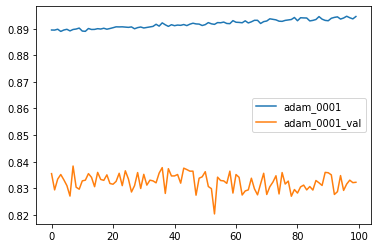

In [30]:
import matplotlib.pyplot as pl
plt.plot(adam_0001_history.history['accuracy'], label = "adam_0001")
plt.plot(adam_0001_history.history['val_accuracy'], label = "adam_0001_val")
plt.legend()
plt.show()